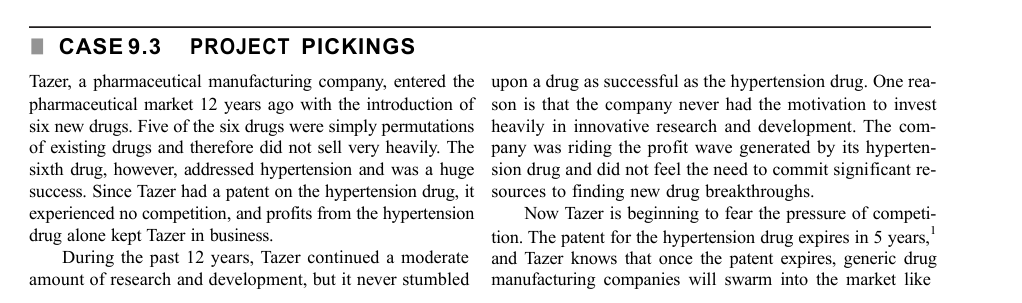
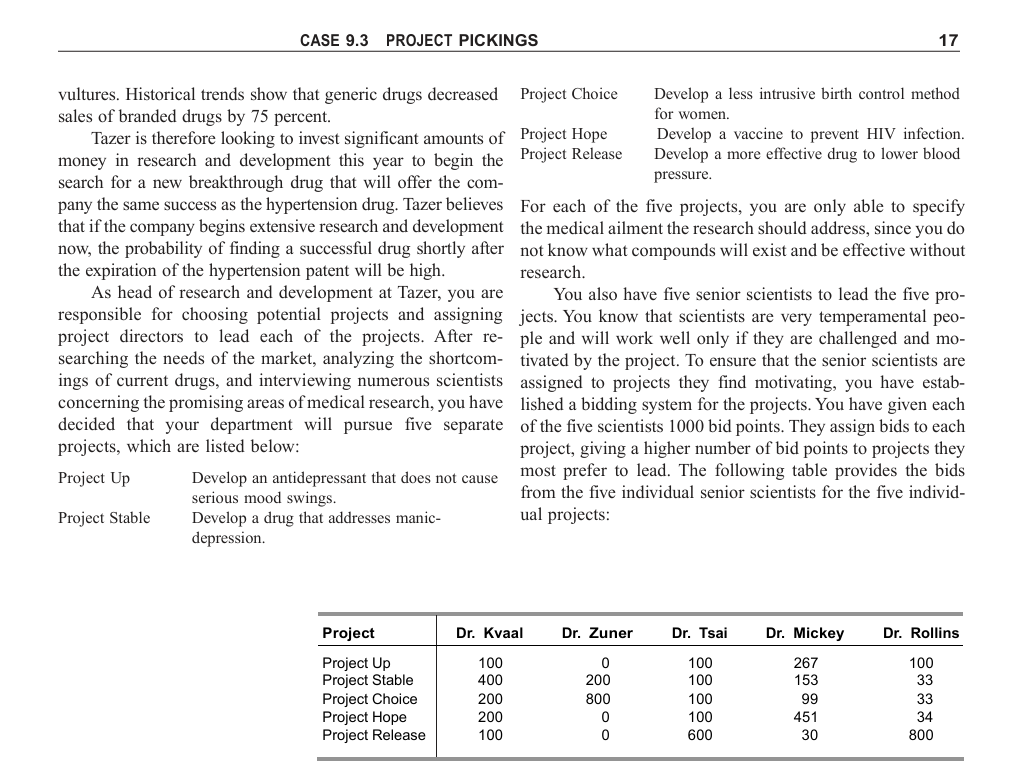
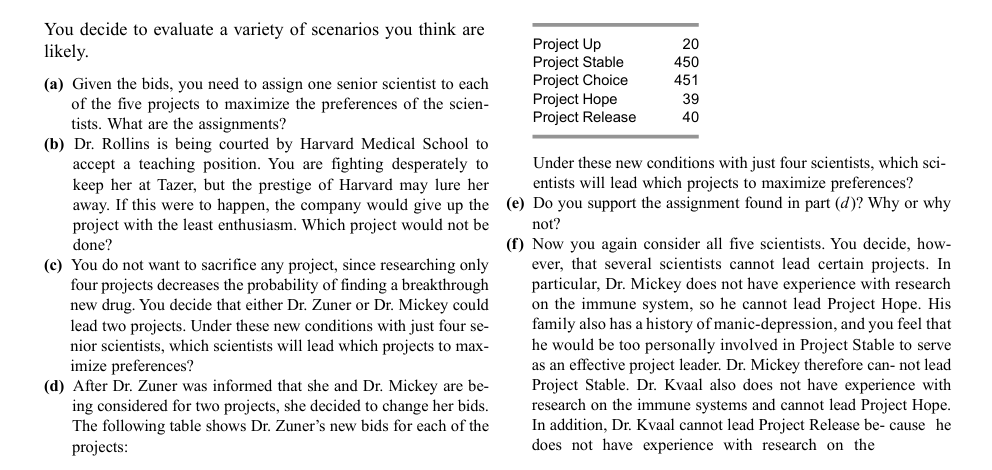
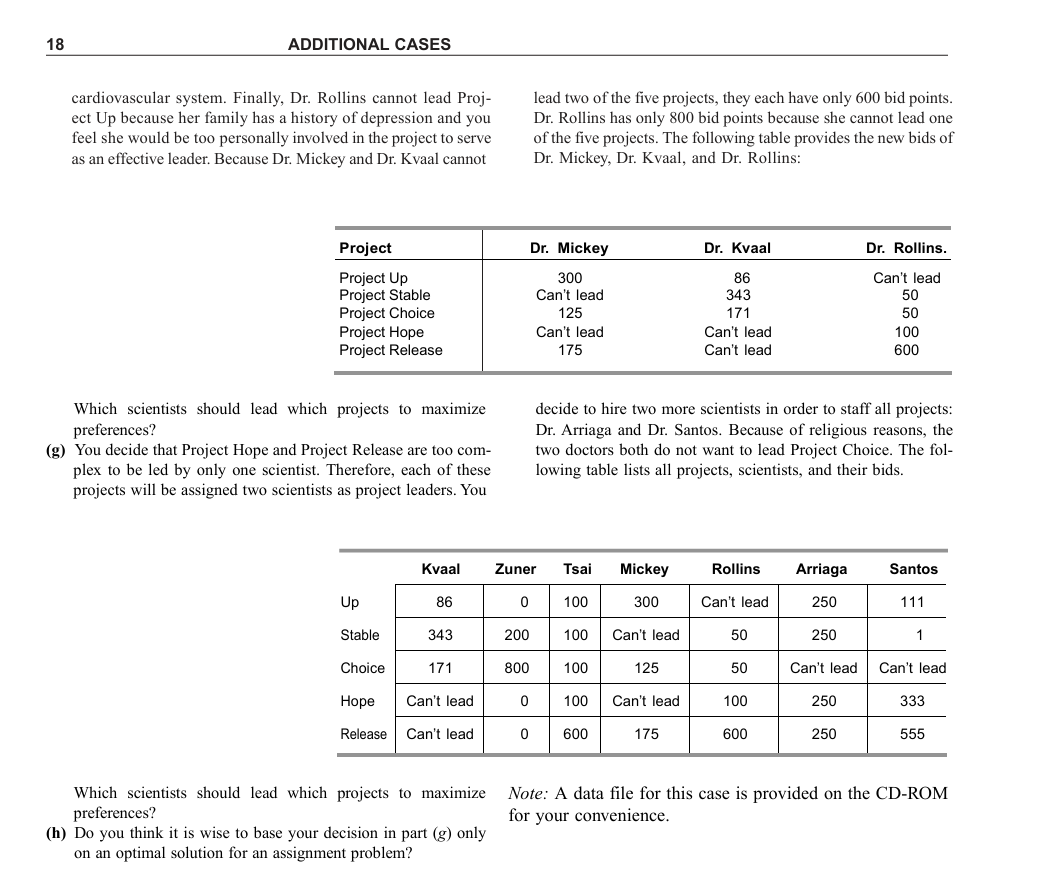

In [4]:
import gurobipy as gp
from gurobipy import GRB

model = gp.Model("New Project Assignment")

projects = [1,2,3,4,5]
doctors = [1,2,3,4,5]
project_names = {1:'Up',2:'Stable',3:'Choice',4:'Hope',5:'Release'}
doctor_names = {1:'Kvaal',2:'Zuner',3:'Tsai',4:'Mickey',5:'Rollins'}

pref = {
    (1, 1): 100, (1, 2): 0,   (1, 3): 100, (1, 4): 267, (1, 5): 100,
    (2, 1): 400, (2, 2): 200, (2, 3): 100, (2, 4): 153, (2, 5): 33,
    (3, 1): 200, (3, 2): 800, (3, 3): 100, (3, 4): 99,  (3, 5): 33,
    (4, 1): 200, (4, 2): 0,   (4, 3): 100, (4, 4): 451, (4, 5): 34,
    (5, 1): 100, (5, 2): 0,   (5, 3): 600, (5, 4): 30,  (5, 5): 800
}   ## (Project, Doctor): Preference Points

## Adding Variables ##
x = model.addVars(pref.keys(),vtype = GRB.BINARY,name = "x")  ## Binary variable to decide if a project will be assigned to a doctor or not

## Objective Function ##
model.setObjective(gp.quicksum(pref[(i,j)]*x[i,j] for i,j in pref.keys()),GRB.MAXIMIZE)

## Constraints ##
for i in projects:
    model.addConstr(gp.quicksum(x[i,j] for j in doctors) == 1)  ## Each Project must be assigned a doctor

for j in doctors:
    model.addConstr(gp.quicksum(x[i,j] for i in projects) == 1)  ## Each doctor must be assigned a project

model.optimize()

if model.status == GRB.OPTIMAL:
    print("\nProject Assignment")
    for i,j in pref.keys():
        if x[i,j].X > 0:
            print(f"Doctor {doctor_names[j]} assigned to project {project_names[i]}")
    print(f"Maximized Preference Points : {model.ObjVal}")
else:
    print("Optimal Solution Not Found")



Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1360P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 10 rows, 25 columns and 50 nonzeros
Model fingerprint: 0x149a529b
Variable types: 0 continuous, 25 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 8e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 386.0000000
Presolve time: 0.00s
Presolved: 10 rows, 25 columns, 50 nonzeros
Variable types: 0 continuous, 25 integer (25 binary)

Root relaxation: objective 2.551000e+03, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    2551.0000000 2551.0

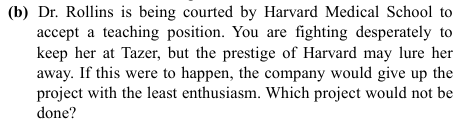

In [7]:
pref_scores = {}
for i in projects:
    pref_scores[i] = sum(pref[(i,j)] for j in doctors)

min_score = min(pref_scores.values())
min_project = min(pref_scores,key = pref_scores.get)

print(f"Project {min_project} has the lowest total preference score: {min_score}")

Project 1 has the lowest total preference score: 567


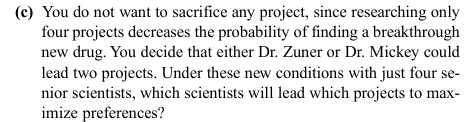

In [9]:
model = gp.Model("New Project Assignment")

projects = [1,2,3,4,5]
doctors = [1,2,3,4]
project_names = {1:'Up',2:'Stable',3:'Choice',4:'Hope',5:'Release'}
doctor_names = {1:'Kvaal',2:'Zuner',3:'Tsai',4:'Mickey'}

pref = {
    (1, 1): 100, (1, 2): 0,   (1, 3): 100, (1, 4): 267, 
    (2, 1): 400, (2, 2): 200, (2, 3): 100, (2, 4): 153,
    (3, 1): 200, (3, 2): 800, (3, 3): 100, (3, 4): 99,  
    (4, 1): 200, (4, 2): 0,   (4, 3): 100, (4, 4): 451, 
    (5, 1): 100, (5, 2): 0,   (5, 3): 600, (5, 4): 30,
}   ## (Project, Doctor): Preference Points

## Adding Variables ##
x = model.addVars(pref.keys(),vtype = GRB.BINARY,name = "x")  ## Binary variable to decide if a project will be assigned to a doctor or not

## Objective Function ##
model.setObjective(gp.quicksum(pref[(i,j)]*x[i,j] for i,j in pref.keys()),GRB.MAXIMIZE)

## Constraints ##
for i in projects:
    model.addConstr(gp.quicksum(x[i,j] for j in doctors) == 1)  ## Each Project must be assigned a doctor

for j in doctors:
    if j == 1 or j == 3:
        model.addConstr(gp.quicksum(x[i,j] for i in projects) == 1)  ## Each doctor must be assigned a project
    else:
        model.addConstr(gp.quicksum(x[i,j] for i in projects) <= 2)   ## Micky and Zuner can lead up to 2 projects
model.optimize()

if model.status == GRB.OPTIMAL:
    print("\nProject Assignment")
    for i,j in pref.keys():
        if x[i,j].X > 0:
            print(f"Doctor {doctor_names[j]} assigned to project {project_names[i]}")
    print(f"Maximized Preference Points : {model.ObjVal}")
else:
    print("Optimal Solution Not Found")


Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1360P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 9 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x181fe0b6
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 8e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 1781.0000000
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 40 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)

Root relaxation: objective 2.518000e+03, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    2518.0000000 2518.00

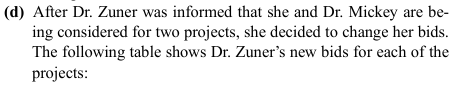
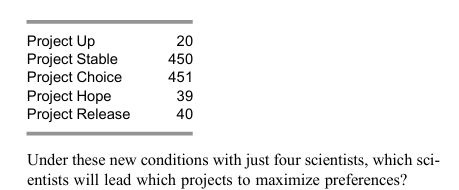

In [10]:
model = gp.Model("New Project Assignment")

projects = [1,2,3,4,5]
doctors = [1,2,3,4]
project_names = {1:'Up',2:'Stable',3:'Choice',4:'Hope',5:'Release'}
doctor_names = {1:'Kvaal',2:'Zuner',3:'Tsai',4:'Mickey'}

pref = {
    (1, 1): 100, (1, 2): 20,   (1, 3): 100, (1, 4): 267, 
    (2, 1): 400, (2, 2): 450, (2, 3): 100, (2, 4): 153,
    (3, 1): 200, (3, 2): 451, (3, 3): 100, (3, 4): 99,  
    (4, 1): 200, (4, 2): 39,   (4, 3): 100, (4, 4): 451, 
    (5, 1): 100, (5, 2): 40,   (5, 3): 600, (5, 4): 30,
}   ## (Project, Doctor): Preference Points

## Adding Variables ##
x = model.addVars(pref.keys(),vtype = GRB.BINARY,name = "x")  ## Binary variable to decide if a project will be assigned to a doctor or not

## Objective Function ##
model.setObjective(gp.quicksum(pref[(i,j)]*x[i,j] for i,j in pref.keys()),GRB.MAXIMIZE)

## Constraints ##
for i in projects:
    model.addConstr(gp.quicksum(x[i,j] for j in doctors) == 1)  ## Each Project must be assigned a doctor

for j in doctors:
    if j == 1 or j == 3:
        model.addConstr(gp.quicksum(x[i,j] for i in projects) == 1)  ## Each doctor must be assigned a project
    else:
        model.addConstr(gp.quicksum(x[i,j] for i in projects) <= 2)   ## Micky and Zuner can lead up to 2 projects
model.optimize()

if model.status == GRB.OPTIMAL:
    print("\nProject Assignment")
    for i,j in pref.keys():
        if x[i,j].X > 0:
            print(f"Doctor {doctor_names[j]} assigned to project {project_names[i]}")
    print(f"Maximized Preference Points : {model.ObjVal}")
else:
    print("Optimal Solution Not Found")

Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1360P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 9 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x1b49e048
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+01, 6e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 1432.0000000
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 40 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)

Root relaxation: objective 2.169000e+03, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    2169.0000000 2169.0

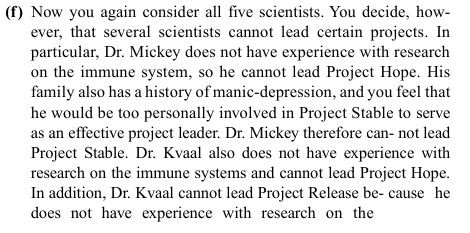
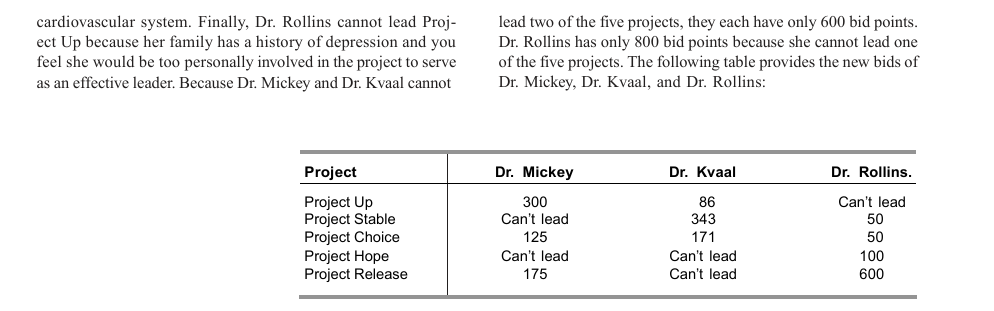
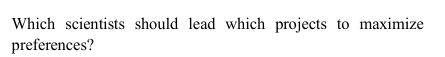

In [11]:
model = gp.Model("New Project Assignment")

projects = [1,2,3,4,5]
doctors = [1,2,3,4,5]
project_names = {1:'Up',2:'Stable',3:'Choice',4:'Hope',5:'Release'}
doctor_names = {1:'Kvaal',2:'Zuner',3:'Tsai',4:'Mickey',5:'Rollins'}

pref = {
    (1, 1): 86, (1, 2): 0,   (1, 3): 100, (1, 4): 300, (1, 5): 0,
    (2, 1): 343, (2, 2): 200, (2, 3): 100, (2, 4): 0, (2, 5): 50,
    (3, 1): 171, (3, 2): 800, (3, 3): 100, (3, 4): 125,  (3, 5): 50,
    (4, 1): 0, (4, 2): 0,   (4, 3): 100, (4, 4): 0, (4, 5): 100,
    (5, 1): 0, (5, 2): 0,   (5, 3): 600, (5, 4): 175,  (5, 5): 600
}   ## (Project, Doctor): Preference Points

## Adding Variables ##
x = model.addVars(pref.keys(),vtype = GRB.BINARY,name = "x")  ## Binary variable to decide if a project will be assigned to a doctor or not

## Objective Function ##
model.setObjective(gp.quicksum(pref[(i,j)]*x[i,j] for i,j in pref.keys()),GRB.MAXIMIZE)

## Constraints ##
for i in projects:
    model.addConstr(gp.quicksum(x[i,j] for j in doctors) == 1)  ## Each Project must be assigned a doctor

for j in doctors:
    model.addConstr(gp.quicksum(x[i,j] for i in projects) == 1)  ## Each doctor must be assigned a project

model.optimize()

if model.status == GRB.OPTIMAL:
    print("\nProject Assignment")
    for i,j in pref.keys():
        if x[i,j].X > 0:
            print(f"Doctor {doctor_names[j]} assigned to project {project_names[i]}")
    print(f"Maximized Preference Points : {model.ObjVal}")
else:
    print("Optimal Solution Not Found")



Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1360P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 10 rows, 25 columns and 50 nonzeros
Model fingerprint: 0x997cb3e2
Variable types: 0 continuous, 25 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+01, 8e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 236.0000000
Presolve time: 0.00s
Presolved: 10 rows, 25 columns, 50 nonzeros
Variable types: 0 continuous, 25 integer (25 binary)

Root relaxation: objective 2.143000e+03, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    2143.0000000 2143.0

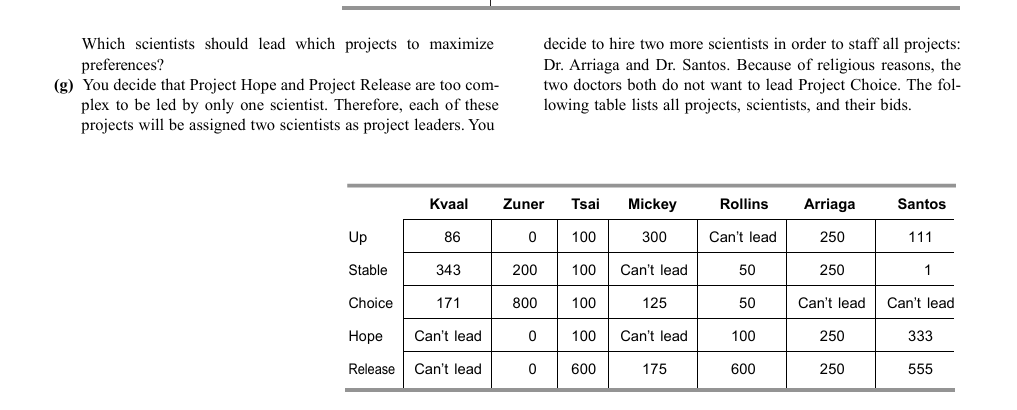

In [13]:
model = gp.Model("New Project Assignment")

projects = [1,2,3,4,5]
doctors = [1,2,3,4,5,6,7]
project_names = {1:'Up',2:'Stable',3:'Choice',4:'Hope',5:'Release'}
doctor_names = {1:'Kvaal',2:'Zuner',3:'Tsai',4:'Mickey',5:'Rollins',6:'Arriaga',7:'Santos'}

pref = {
    (1, 1): 86, (1, 2): 0,   (1, 3): 100, (1, 4): 300, (1, 5): 0,(1,6):250,(1,7):211,
    (2, 1): 343, (2, 2): 200, (2, 3): 100, (2, 4): 0, (2, 5): 50,(2,6):250,(2,7):1,
    (3, 1): 171, (3, 2): 800, (3, 3): 100, (3, 4): 125,  (3, 5): 50,(3,6):0,(3,7):0,
    (4, 1): 0, (4, 2): 0,   (4, 3): 100, (4, 4): 0, (4, 5): 100,(4,6):250,(4,7):333,
    (5, 1): 0, (5, 2): 0,   (5, 3): 600, (5, 4): 175,  (5, 5): 600,(5,6):250,(5,7):555
}   ## (Project, Doctor): Preference Points

## Adding Variables ##
x = model.addVars(pref.keys(),vtype = GRB.BINARY,name = "x")  ## Binary variable to decide if a project will be assigned to a doctor or not

## Objective Function ##
model.setObjective(gp.quicksum(pref[(i,j)]*x[i,j] for i,j in pref.keys()),GRB.MAXIMIZE)

## Constraints ##
for i in projects:
    if i not in [4,5]:
        model.addConstr(gp.quicksum(x[i,j] for j in doctors) == 1)  ## Each Project must be assigned a doctor
    else:
        model.addConstr(gp.quicksum(x[i,j] for j in doctors) == 2)  ## Project 4 and 5 must be assigned 2 doctors 

for j in doctors:
    model.addConstr(gp.quicksum(x[i,j] for i in projects) == 1)  ## Each doctor must be assigned a project

model.optimize()

if model.status == GRB.OPTIMAL:
    print("\nProject Assignment")
    for i,j in pref.keys():
        if x[i,j].X > 0:
            print(f"Doctor {doctor_names[j]} assigned to project {project_names[i]}")
    print(f"Maximized Preference Points : {model.ObjVal}")
else:
    print("Optimal Solution Not Found")



Gurobi Optimizer version 12.0.2 build v12.0.2rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-1360P, instruction set [SSE2|AVX|AVX2]
Thread count: 12 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 12 rows, 35 columns and 70 nonzeros
Model fingerprint: 0xc5001da3
Variable types: 0 continuous, 35 integer (35 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 8e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+00]
Found heuristic solution: objective 711.0000000
Presolve time: 0.00s
Presolved: 12 rows, 35 columns, 70 nonzeros
Variable types: 0 continuous, 35 integer (35 binary)

Root relaxation: objective 3.226000e+03, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    3226.0000000 3226.0